# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_1")
network_file = os.path.join(network_path, "network-synapses-minimal.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_1.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_1.hdf5")
duration = 18

# Plot network

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


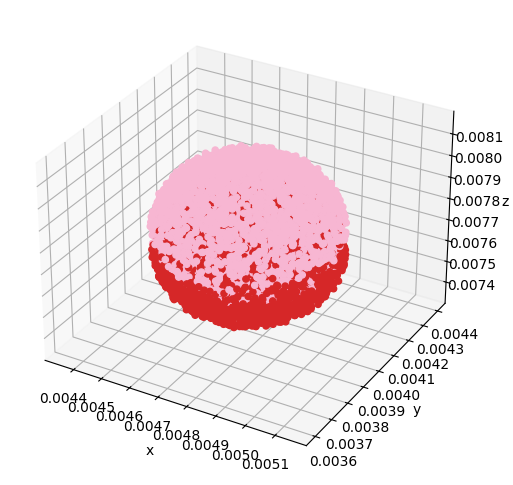

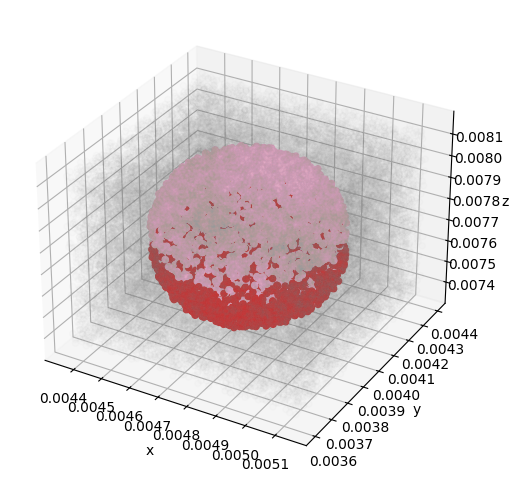

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


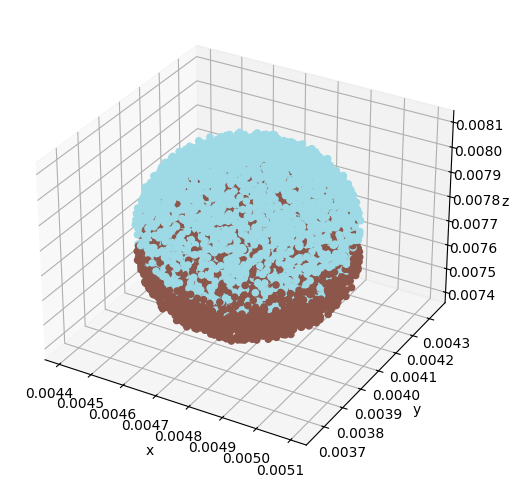

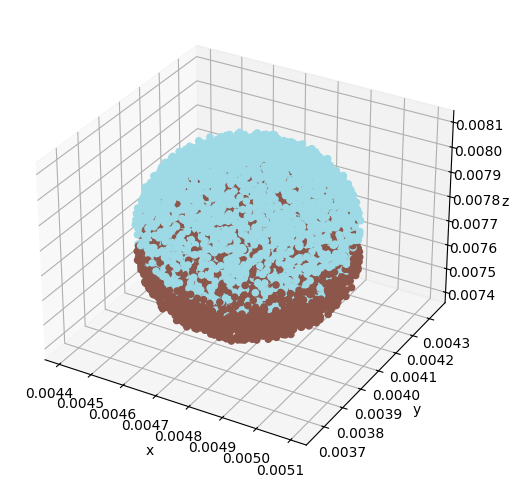

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

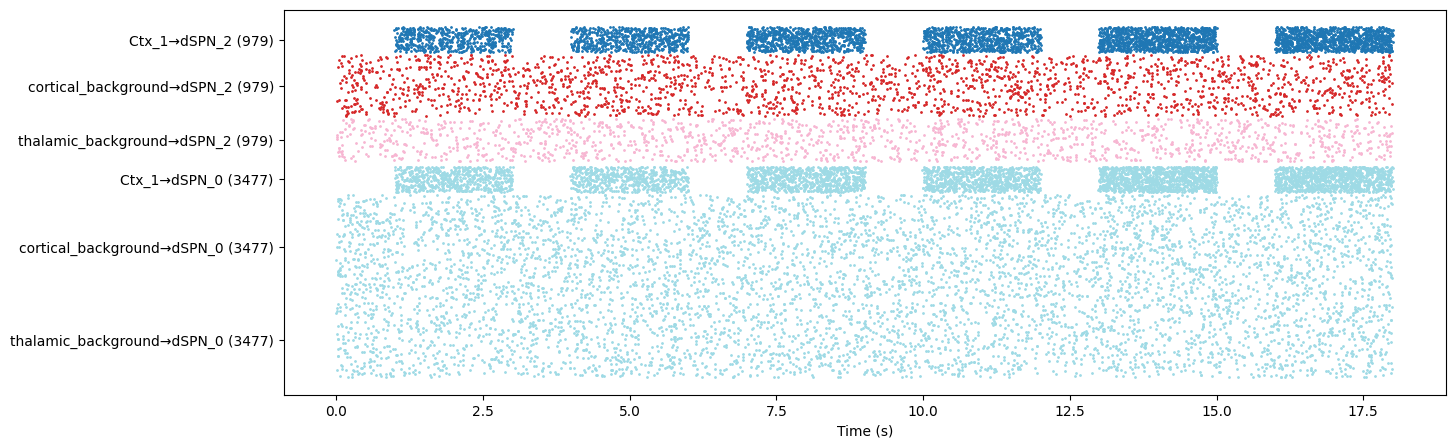

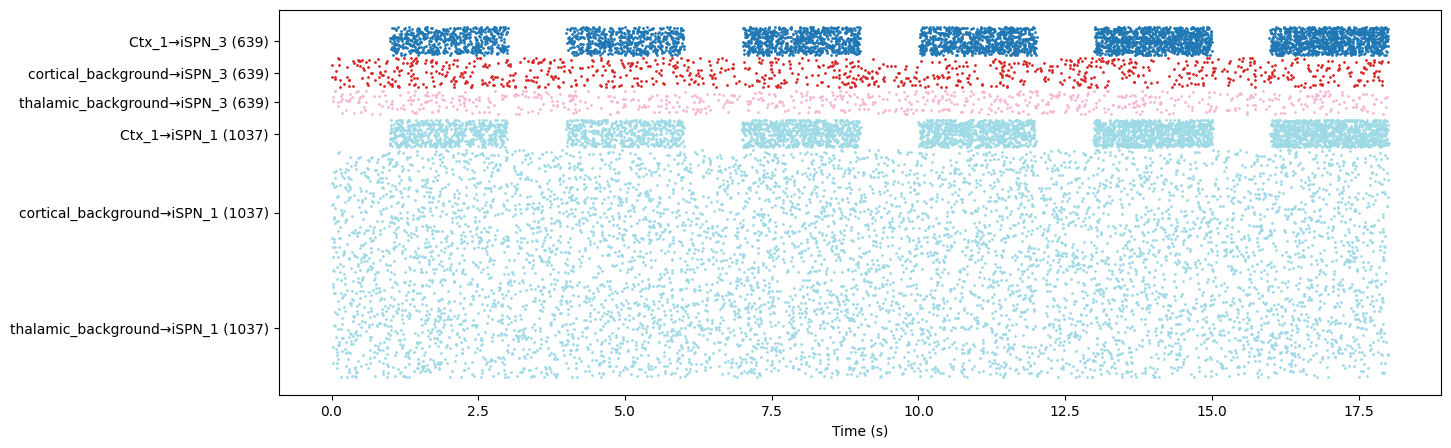

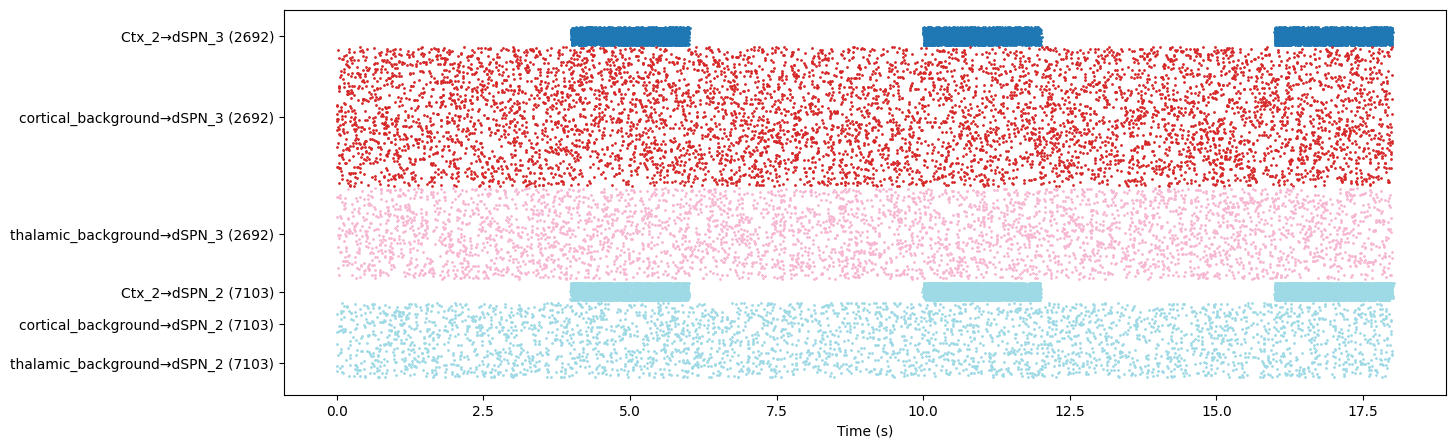

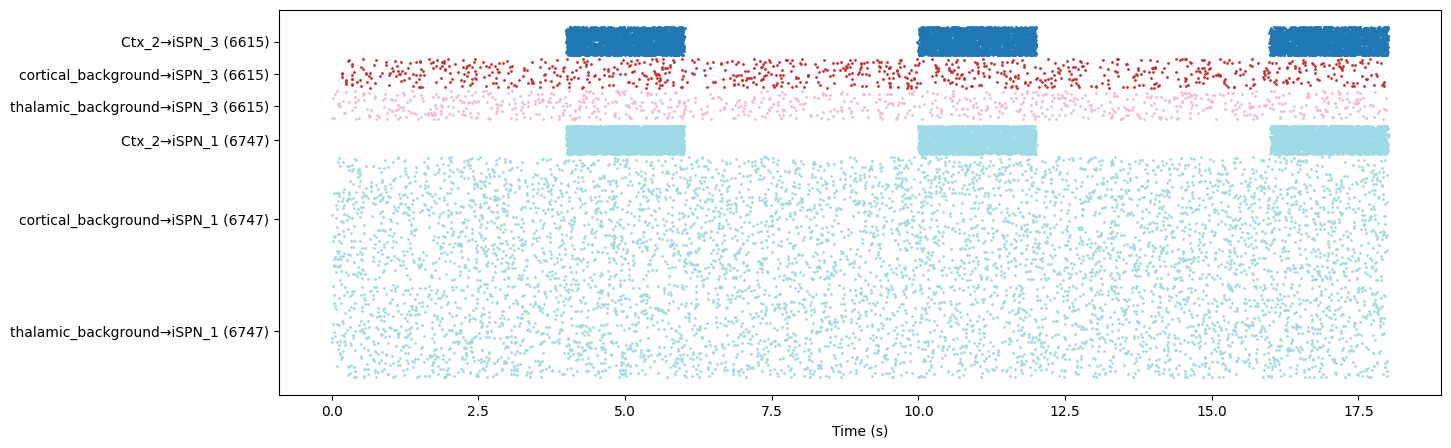

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-with-synapses-sten_1.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
5: (iSPN_0, p581376d6, m6486ed26)
79: (dSPN_2, pb267a31a, m7721d5cf)
111: (iSPN_0, pf721cf77, m6486ed26)
112: (iSPN_0, p581376d6, m6486ed26)
116: (iSPN_0, p039c9f4f, mc16840cd)
117: (iSPN_0, pf721cf77, m7bc82287)
125: (iSPN_0, pd300f5b9, m3a845add)
128: (iSPN_0, p635b801c, mc16840cd)
132: (iSPN_0, p635b801c, md0f5647c)
239: (iSPN_0, p635b801c, m6486ed26)
248: (dSPN_0, p7aa400d6, m9fda9b20)
291: (dSPN_1, p6c462b98, mad2e6da1)
292: (dSPN_1, p6c462b98, m7fe0fbde)
302: (dSPN_1, pdcbfd03a, mc44c4566)
392: (iSPN_0, pf721cf77, m3a845add)
395: (iSPN_0, p635b801c, m7bc82287)
396: (iSPN_0, pf721cf77, md0f5647c)
400: (iSPN_0, p039c9f4f, md0f5647c)
402: (iSPN_0, p635b801c, mf2f3395e)
405: (iSPN_0, p635b801c, md0f5647c)
408: (iSPN_0, p635b801c, m69613ef9)
415: (iSPN_0, pf721cf77, m3a845add)
512: (iSPN_3, p55446481, m1083058d)
587: (iSPN_0

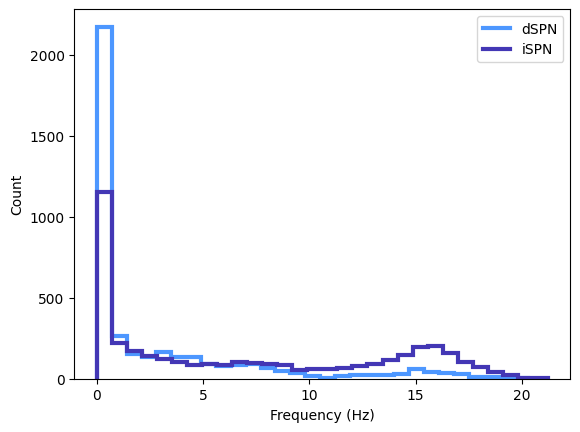

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


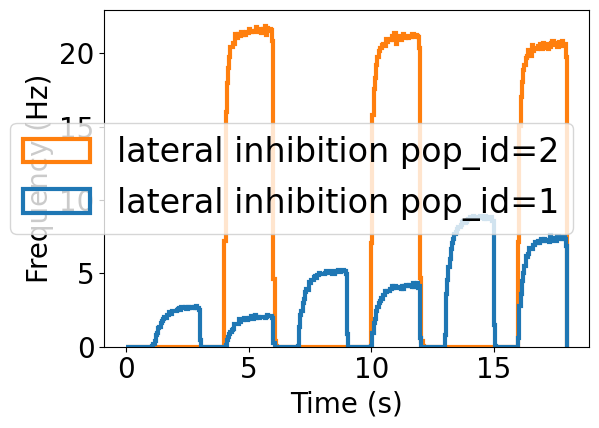

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-no-synapses-sten_1.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
6: (iSPN_0, pfb05971b, mf2f3395e)
17: (iSPN_0, pfb05971b, m69613ef9)
111: (iSPN_0, pf721cf77, m6486ed26)
112: (iSPN_0, p581376d6, m6486ed26)
114: (iSPN_0, p67dac726, m69613ef9)
119: (iSPN_0, p581376d6, m6486ed26)
120: (iSPN_0, p039c9f4f, mf2f3395e)
128: (iSPN_0, p635b801c, mc16840cd)
130: (iSPN_0, pf721cf77, m3a845add)
132: (iSPN_0, p635b801c, md0f5647c)
133: (iSPN_0, pfb05971b, m3a845add)
211: (dSPN_1, p81757e87, mad2e6da1)
239: (iSPN_0, p635b801c, m6486ed26)
262: (dSPN_0, p7517a0e9, m37886c78)
264: (dSPN_0, p1863c9a5, m9fda9b20)
269: (dSPN_0, pc8cbdb24, mc710c1a4)
272: (dSPN_0, pe6ec2d4b, mf702205f)
300: (dSPN_1, p81757e87, mad2e6da1)
333: (dSPN_2, pb267a31a, m7721d5cf)
391: (iSPN_0, p581376d6, m6486ed26)
392: (iSPN_0, pf721cf77, m3a845add)
402: (iSPN_0, p635b801c, mf2f3395e)
405: (iSPN_0, p635b801c, md0f5647c)
409: (iSPN_0, 

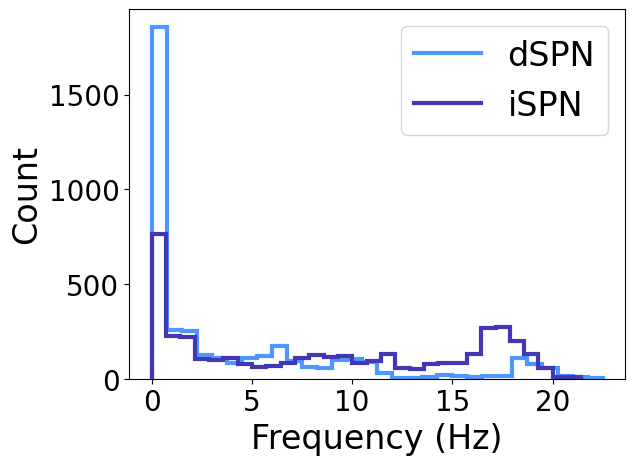

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


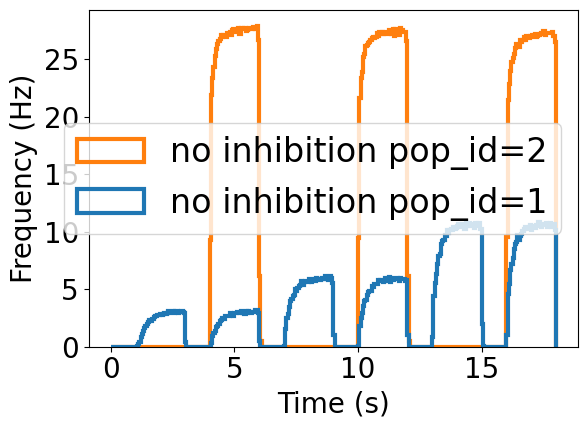

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


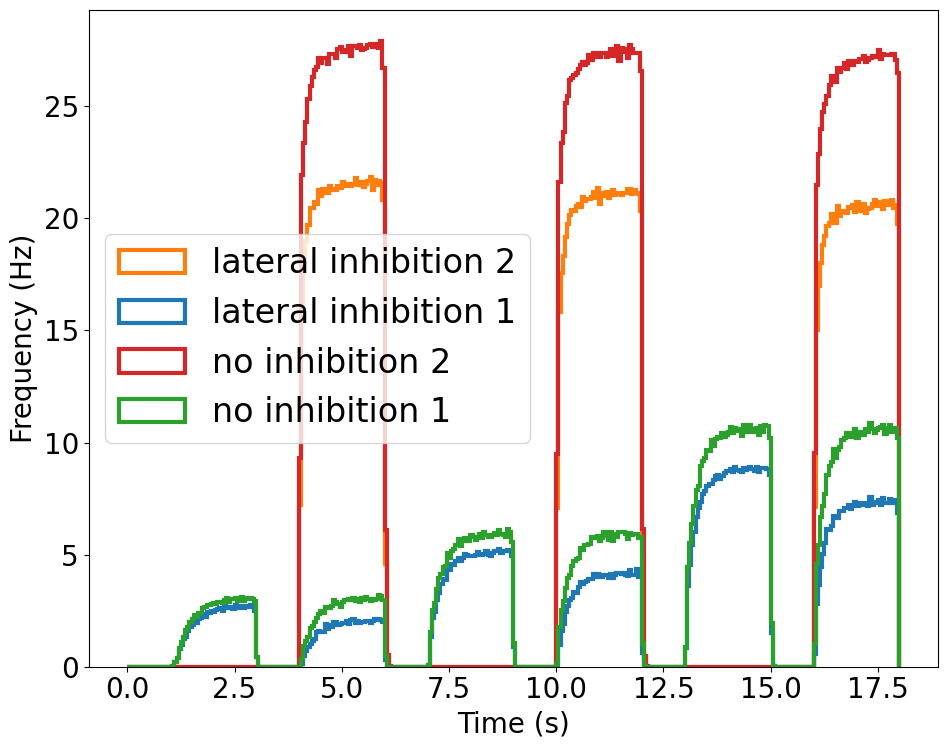

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

In [13]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [14]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-with-synapses-sten_1.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
5: (iSPN_0, p581376d6, m6486ed26)
79: (dSPN_2, pb267a31a, m7721d5cf)
111: (iSPN_0, pf721cf77, m6486ed26)
112: (iSPN_0, p581376d6, m6486ed26)
116: (iSPN_0, p039c9f4f, mc16840cd)
117: (iSPN_0, pf721cf77, m7bc82287)
125: (iSPN_0, pd300f5b9, m3a845add)
128: (iSPN_0, p635b801c, mc16840cd)
132: (iSPN_0, p635b801c, md0f5647c)
239: (iSPN_0, p635b801c, m6486ed26)
248: (dSPN_0, p7aa400d6, m9fda9b20)
291: (dSPN_1, p6c462b98, mad2e6da1)
292: (dSPN_1, p6c462b98, m7fe0fbde)
302: (dSPN_1, pdcbfd03a, mc44c4566)
392: (iSPN_0, pf721cf77, m3a845add)
395: (iSPN_0, p635b801c, m7bc82287)
396: (iSPN_0, pf721cf77, md0f5647c)
400: (iSPN_0, p039c9f4f, md0f5647c)
402: (iSPN_0, p635b801c, mf2f3395e)
405: (iSPN_0, p635b8

In [15]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

In [ ]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [   0    1    2 ... 7965 7976 7979]
Plotted 4000 traces (total 8000)


In [ ]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

In [ ]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

In [ ]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

In [ ]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [ ]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

In [ ]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

In [ ]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

In [ ]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

In [ ]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)